In [35]:
import sys
sys.path.append('/home/599/dbi599/unseen/unseen')

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr
import numpy as np
import xclim

import fileio

In [3]:
awap_file = '/g/data/xv83/dbi599/pr_awap_1900-2019_A-DEC-sum_wheat-sheep-sum.zarr.zip'

In [4]:
cafe_file = '/g/data/xv83/dbi599/pr_cafe-c5-d60-pX-f6_19900501-19931101_A-DEC-sum_wheat-sheep-sum.zarr.zip'

In [5]:
awap_ds = fileio.open_file(awap_file)

In [6]:
awap_ds

<xarray.Dataset>
Dimensions:  (region: 3, time: 120)
Coordinates:
  * region   (region) object 'south-west' 'south-east' 'north-east'
  * time     (time) object 1900-01-01 09:00:00 ... 2019-01-01 09:00:00
Data variables:
    pr       (time, region) float64 dask.array<chunksize=(1, 1), meta=np.ndarray>
Attributes:
    history:  Wed Jul 28 12:06:50 2021: /g/data/e14/dbi599/miniconda3/envs/un...

In [7]:
awap_ds['pr']

<xarray.DataArray 'pr' (time: 120, region: 3)>
dask.array<open_dataset-b60fe0cbeee32e6072381b0748a77f38pr, shape=(120, 3), dtype=float64, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * region   (region) object 'south-west' 'south-east' 'north-east'
  * time     (time) object 1900-01-01 09:00:00 ... 2019-01-01 09:00:00
Attributes:
    analysis_time:                 2010-10-23 14:49:46 UTC
    analysis_version_number:       3.01
    cell_methods:                  time: sum
    frequency:                     daily
    grid_mapping:                  crs
    length_scale_for_analysis:     80.0
    long_name:                     Daily precipitation
    number_of_stations_reporting:  2757
    source:                        Interpolated surface observations
    standard_name:                 lwe_thickness_of_precipitation_amount
    units:                         mm yr-1
    valid_range:                   [-1.0, 100000.0]

TODO: Change long name and standard name.

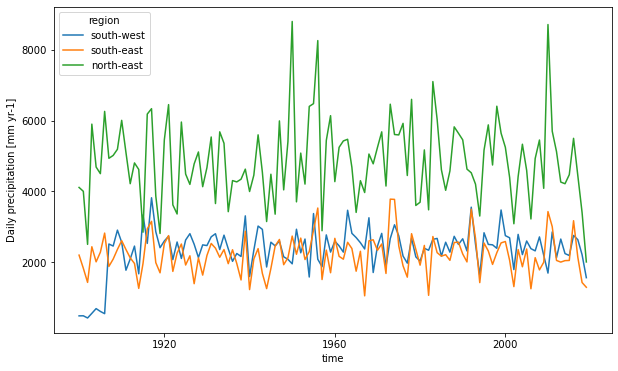

In [8]:
fig = plt.figure(figsize=[10, 6])

awap_ds['pr'].plot(hue='region')

plt.show()

In [84]:
years = awap_ds['time'].dt.year.values
awap_df = pd.DataFrame(index=years)

awap_df['south-west'] = awap_ds['pr'].sel(region='south-west').values
awap_df['south-east'] = awap_ds['pr'].sel(region='south-east').values
awap_df['north-east'] = awap_ds['pr'].sel(region='north-east').values

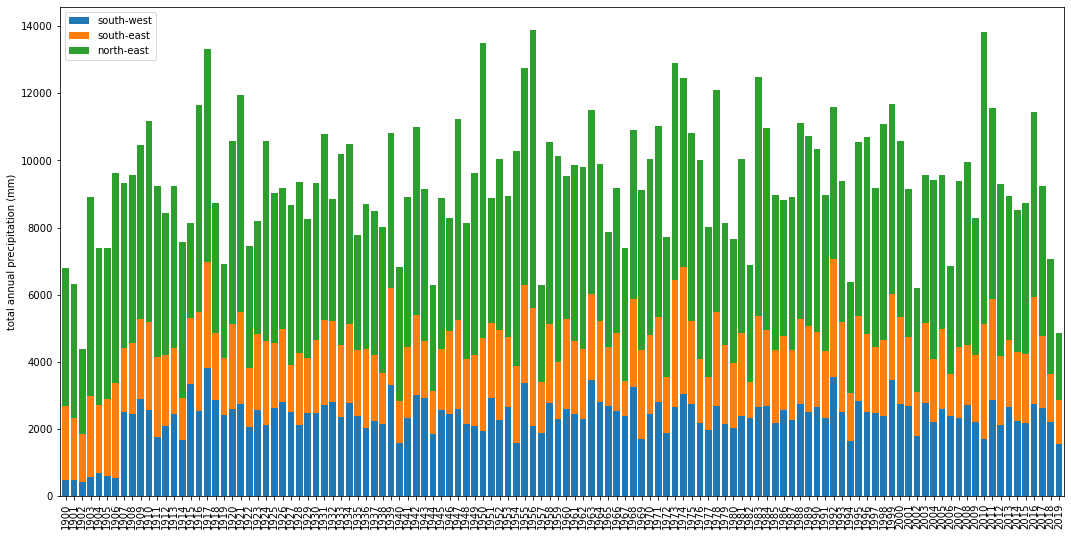

In [88]:
awap_df.plot.bar(stacked=True, figsize=[18, 9], width=0.8)
plt.ylabel('total annual precipitation (mm)')
plt.show()

In [27]:
cafe_ds = fileio.open_file(cafe_file)

In [28]:
cafe_ds

<xarray.Dataset>
Dimensions:    (ensemble: 96, init_date: 8, lead_time: 9, region: 3)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1991-05-01 00:00:00 ... 1994-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
  * region     (region) object 'south-west' 'south-east' 'north-east'
    time       (lead_time, init_date) object dask.array<chunksize=(9, 8), meta=np.ndarray>
Data variables:
    pr         (init_date, lead_time, region, ensemble) float32 dask.array<chunksize=(1, 9, 1, 96), meta=np.ndarray>
Attributes:
    comment:    pressure level interpolator, version 3.0, precision=double
    filename:   atmos_isobaric_daily.zarr
    grid_tile:  N/A
    grid_type:  regular
    history:    Wed Jul 28 14:28:53 2021: /g/data/e14/dbi599/miniconda3/envs/...
    title:      AccessOcean-AM2

In [29]:
cafe_ds['pr']

<xarray.DataArray 'pr' (init_date: 8, lead_time: 9, region: 3, ensemble: 96)>
dask.array<open_dataset-1cb3e9da347d9a8c71ea0b4e46f1cbe9pr, shape=(8, 9, 3, 96), dtype=float32, chunksize=(1, 9, 1, 96), chunktype=numpy.ndarray>
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 ... 88 89 90 91 92 93 94 95 96
  * init_date  (init_date) object 1991-05-01 00:00:00 ... 1994-11-01 00:00:00
  * lead_time  (lead_time) int64 0 1 2 3 4 5 6 7 8
  * region     (region) object 'south-west' 'south-east' 'north-east'
    time       (lead_time, init_date) object dask.array<chunksize=(9, 8), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean
    interp_method:  conserve_order1
    long_name:      Total precipitation rate
    time_avg_info:  average_T1,average_T2,average_DT
    units:          mm yr-1

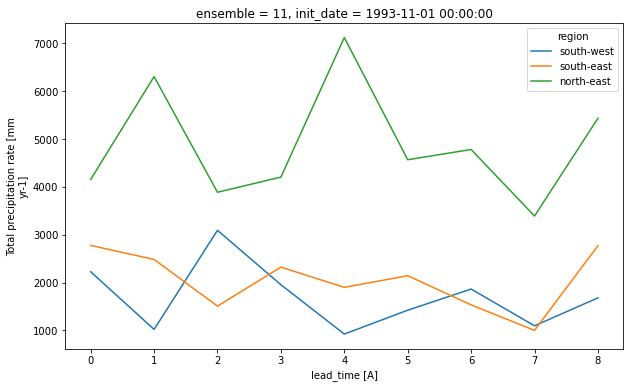

In [30]:
fig = plt.figure(figsize=[10, 6])

cafe_ds.isel(ensemble=10, init_date=5)['pr'].plot(hue='region')

plt.show()